In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("E:\\Course\\data\\", one_hot = True)
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

C:\Users\Admin\Anaconda2\envs\tensorflow\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting E:\Course\data\train-images-idx3-ubyte.gz
Extracting E:\Course\data\train-labels-idx1-ubyte.gz
Extracting E:\Course\data\t10k-images-idx3-ubyte.gz
Extracting E:\Course\data\t10k-labels-idx1-ubyte.gz


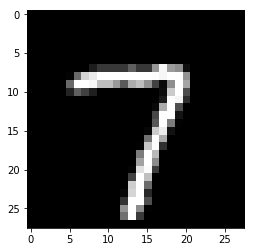

In [2]:
image = mnist.train.images[100]
image = np.array(image, dtype='float')
pixels = image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [3]:
n_nodes_hl1 = 500
n_nodes_hl2 = 500
n_nodes_hl3 = 500

n_classes = 10
batch_size = 100

x = tf.placeholder('float', [None, 784])
y = tf.placeholder('float')

hidden_1_layer = {'weights':tf.Variable(tf.random_normal([784, n_nodes_hl1])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}

hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                  'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}

hidden_3_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                  'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}

output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3, n_classes])),
                'biases':tf.Variable(tf.random_normal([n_classes])),}

def neural_network_model(data):
    
    l1 = tf.add(tf.matmul(data,hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2,hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)

    output = tf.matmul(l3,output_layer['weights']) + output_layer['biases']

    return output

def train_neural_network(x):
    prediction = neural_network_model(x)
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y) )
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    saver = tf.train.Saver()
    hm_epochs = 10
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch in range(hm_epochs):
            epoch_loss = 0
            for _ in range(int(mnist.train.num_examples/batch_size)):
                epoch_x, epoch_y = mnist.train.next_batch(batch_size)
                _, c = sess.run([optimizer, cost], feed_dict={x: epoch_x, y: epoch_y})
                epoch_loss += c
            saver.save(sess, "./model.ckpt")
            print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)
            
        saver.save(sess, "./model.ckpt")
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))

        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy:',accuracy.eval({x:mnist.test.images, y:mnist.test.labels}))

train_neural_network(x)

Epoch 0 completed out of 10 loss: 1985494.9723510742
Epoch 1 completed out of 10 loss: 388315.7452468872
Epoch 2 completed out of 10 loss: 209011.73886036873
Epoch 3 completed out of 10 loss: 121469.505458951
Epoch 4 completed out of 10 loss: 70827.9755526483
Epoch 5 completed out of 10 loss: 43409.57614537104
Epoch 6 completed out of 10 loss: 31403.777863128038
Epoch 7 completed out of 10 loss: 25610.590173996985
Epoch 8 completed out of 10 loss: 16671.06081072986
Epoch 9 completed out of 10 loss: 16111.959027609799
Accuracy: 0.95


## Testing Trained Model

While loading the saved model, model graph should be available in memory.

Note that hidden layers are defined global. That is why they are available. if not we have to initialize the graph (hidden layers) before loading the model.

In [4]:
def test_network(image_index):
    saver = tf.train.Saver()
    y = tf.nn.softmax(neural_network_model(x))
    prediction=tf.argmax(y,1)
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        saver.restore(sess, "./model.ckpt")
        print("Prediction: ",prediction.eval(feed_dict={x: mnist.test.images[image_index].reshape((1,784))})[0])

def print_test_image(image_index):
    image = mnist.test.images[image_index]
    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

INFO:tensorflow:Restoring parameters from ./model.ckpt
Prediction:  0


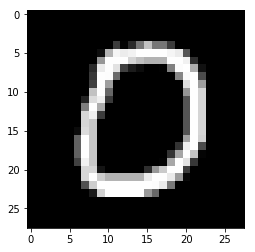

In [5]:
image_index = 10
test_network(image_index)
print_test_image(image_index)

## Cache Model in Memory
This makes the detection faster as model is not loaded each time. However session should remain open.

In [6]:
saver = tf.train.Saver()
y = tf.nn.softmax(neural_network_model(x))
prediction=tf.argmax(y,1)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
saver.restore(sess, "./model.ckpt")


INFO:tensorflow:Restoring parameters from ./model.ckpt


Prediction:  1


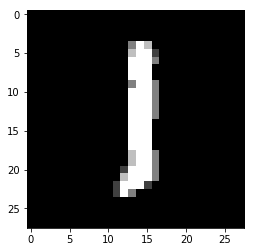

In [7]:
image_index = 14
print("Prediction: ",sess.run(prediction,feed_dict={x: mnist.test.images[image_index].reshape((1,784))})[0])

print_test_image(image_index)

In [8]:
sess.close()